#  Logistic Regression and Classification Error Metrics

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website: above or at https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones 

In [1]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['/Users/Samuel/Desktop/Development/Git_Hub/TP_Regressao_Logistica/IC_Logistic_Regression']

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [2]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [3]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [4]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [5]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [6]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [7]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

9380    5
4787    0
7783    4
6035    5
9252    1
Name: Activity, dtype: int64

### Breve explicação:

Na primeira questão foi feita uma mineração dos dados, ou seja, uma separação das caracteristicas além do estudo dos seus tipos de dados para melhor entendimento.

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [9]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

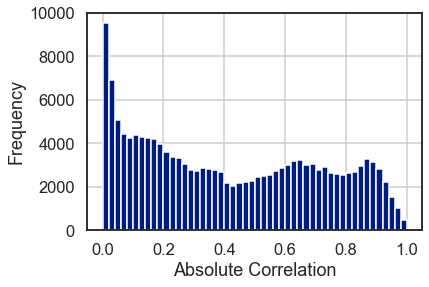

In [11]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [12]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


### Breve explicação:

Foi feito um calculo para analisar as correlações entre as variáveis dependentes, para em seguida, mostrar aquelas que estão mais correlacionados tanto positivamente quanto negativamente.

## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [14]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

### Breve explicação:

Foi feita uma normalização dos dados para melhor eficiencia dos algoritmos de regressão que serão utilizados.

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitt ing a multi-class model so you understand the coefficient output. Store the model.

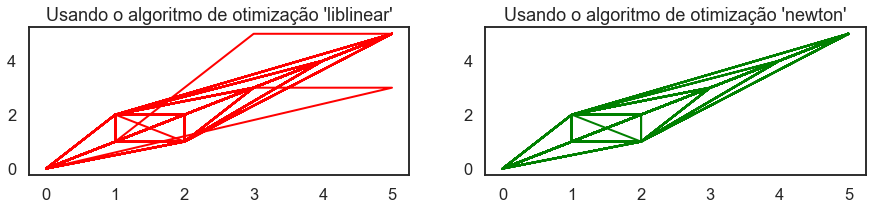

In [15]:
from sklearn.linear_model import LogisticRegression
# Standard logistic regressio
lr = LogisticRegression(max_iter=500, penalty='none', solver='lbfgs').fit(X_train, y_train)
t1_lr = LogisticRegression(max_iter=3000, penalty='l2', solver='lbfgs').fit(X_train, y_train) #Default solver 'lbfgs'

t2_lr = LogisticRegression(max_iter=500, penalty='l1', solver='liblinear').fit(X_train, y_train)
t3_lr = LogisticRegression(max_iter=500, penalty='l2', solver='newton-cg').fit(X_train, y_train)

try2_lr = t2_lr.predict(X_train)
try3_lr = t3_lr.predict(X_train)

figure = plt.figure(figsize=(15,6))
plt.subplot(221)
plt.title("Usando o algoritmo de otimização 'liblinear'")
plt.plot(y_train, try2_lr, c='r', linewidth=2)

plt.subplot(222)
plt.title("Usando o algoritmo de otimização 'newton'")
plt.plot(y_train, try3_lr, c='g', linewidth=2)




### Breve explicação:

Foi utilizados algoritmos de otimização que possuem a vantagem de não precisa do alfa, como no calculo do gradiente, entretanto com a desvantagem de serem mais complexos. Acima foi utilizado dois algoritmos com as suas respectivas penalidades necessárias e uma plotagem para analisarmos a eficiente desses. Nota-se que existe uma diferença na eficiencia do algoritmo liblinear em relação ao de newton.

## Question 5

Calculate the following error metric: 

* accuracy


In [16]:
from sklearn.metrics import accuracy_score

accuracy_liblinear = accuracy_score(y_train, try2_lr)
accuracy_newton_cg = accuracy_score(y_train, try3_lr)

print("Accuracy using liblinear algorithm:", accuracy_liblinear)
print("Accuracy using newton algorithm:", accuracy_newton_cg)

Accuracy using liblinear algorithm: 0.9890414759328617
Accuracy using newton algorithm: 0.9913996393397142
